In [9]:
import sys
import numpy as np
print(sys.version)
import re
from sklearn import svm
from operator import itemgetter
from sklearn import cross_validation
from sklearn.cross_validation import KFold
import pickle
import scipy.stats
import pandas as pd
import scipy as sp
import os
import seaborn as sb


myDataSets,myDataSetName = pickle.load(open('/home/vxue/data/sort_specificity/ncv_y/allData.pickle','rb'))



myWeights = [False]*24


3.5.1 |Continuum Analytics, Inc.| (default, Dec  7 2015, 11:16:01) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [10]:
#Define Dummy Variable Encoding
aminoAcidIndex = 'ACEDGFIHKMLNQPSRTWVY'

def getAAVector(letter):
    vector = np.zeros(20);
    vector[aminoAcidIndex.index(letter)]=1
    return  vector

def encodeWithDummyVariables(sequence):
    newArray=[]
    for aa in sequence:
        newArray.append(getAAVector(aa))
    return np.array(newArray).ravel()

def encodeWithDummyVariables_six(sequence):
    newArray=[]
    for idx,aa in enumerate(sequence):
        if(idx in [6,10,11,13,15,17]):
            newArray.append(getAAVector(aa))
        else:
            newArray.append(np.zeros(20))
    return np.array(newArray).ravel()



for each,name in zip(myDataSets,myDataSetName):
    if(re.search("strict",name)):
        print("strict",end=' ')
        each['aaEncoding'] = each.apply(lambda x: list(encodeWithDummyVariables_six(x.twentytwo)),axis=1)
        print(sum(each.iloc[0]['aaEncoding']))
    else:
        print("normal",end =' ')
        each['aaEncoding'] = each.apply(lambda x: list(encodeWithDummyVariables(x.twentytwo)),axis=1)
        print(sum(each.iloc[0]['aaEncoding']))

normal 22.0
normal 22.0
normal 22.0
normal 22.0
normal 22.0
normal 22.0
normal 22.0
normal 22.0
normal 22.0
normal 22.0
normal 22.0
normal 22.0


In [11]:
dictParams = pickle.load(open("/home/vxue/data/sort_specificity/rmse_doubleSet/ncv_y/bestParams.pickle",'rb'))

In [12]:
myDataSetName

['all_x',
 'all_s',
 'all_f',
 'all_t',
 'all_m',
 'all_n',
 'all_z',
 'all_c',
 'comboall_x',
 'comboall_f',
 'comboall_m',
 'comboall_z']

In [13]:

myModel =svm.SVR(kernel='linear',degree=2,gamma=1,coef0=0) 

for mode in ['linear','poly']:
    for dataset, datasetName, hasWeights in zip(myDataSets, myDataSetName, myWeights):
        
        
        paramC,paramEpsilon = dictParams[mode][datasetName]
        myModel.set_params(kernel=mode, C=paramC,epsilon=paramEpsilon)
        
        print(mode,datasetName,len(dataset),paramC,paramEpsilon)

        clf = myModel

        
        trainData_matrix_all = np.array([np.array(i) for i in dataset.aaEncoding.get_values()])
        trainData_y_all = np.array(dataset.yValue)

        trainData_w_all=None
        if(hasWeights):
            trainData_w_all = np.array(dataset.unnormalized_weights)
        
        
        X_train= trainData_matrix_all
        y_train= trainData_y_all
        w_train = None
        if(hasWeights==True):
            w_train= trainData_w_all
            w_train = w_train / sum(w_train)

        clf.fit(X_train,y_train,sample_weight=w_train)
        
        pickle.dump(clf,open("/home/vxue/data/sort_specificity/rmse_doubleSet/ncv_y/model"+mode+datasetName+".pickle",'wb'))




linear all_x 2794 0.125 0.3
linear all_s 3556 0.125 0.4
linear all_f 1302 0.125 0.35
linear all_t 3484 0.0625 0.25
linear all_m 3479 0.125 0.5
linear all_n 3628 0.125 0.6
linear all_z 1053 0.0625 0.3
linear all_c 2894 0.125 0.2
linear comboall_x 6350 0.5 0.4
linear comboall_f 4786 0.0625 0.3
linear comboall_m 7107 0.125 0.55
linear comboall_z 3947 0.125 0.35
poly all_x 2794 0.00390625 0.1
poly all_s 3556 0.0078125 0.15
poly all_f 1302 0.0078125 0.25
poly all_t 3484 0.00390625 0.25
poly all_m 3479 0.015625 0.15
poly all_n 3628 0.015625 0.25
poly all_z 1053 0.001953125 0.1
poly all_c 2894 0.0078125 0.15
poly comboall_x 6350 0.015625 0.15
poly comboall_f 4786 0.0078125 0.15
poly comboall_m 7107 0.03125 0.25
poly comboall_z 3947 0.0078125 0.15


In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


all_x
all_s
all_f
all_t
all_m
all_n
all_z
all_c
comboall_x
comboall_f
comboall_m
comboall_z


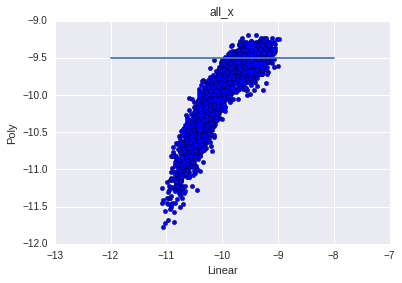

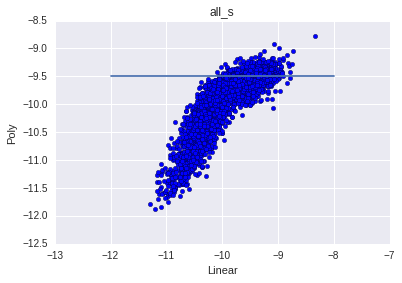

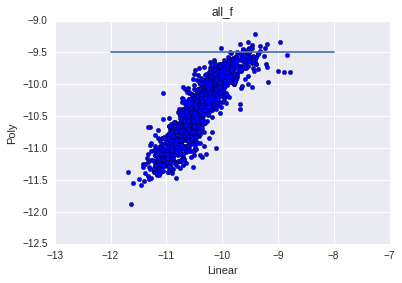

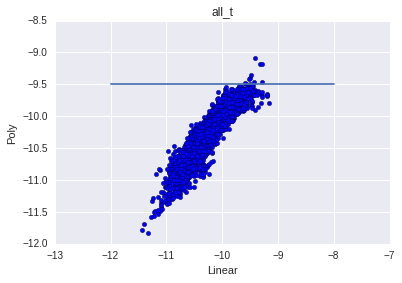

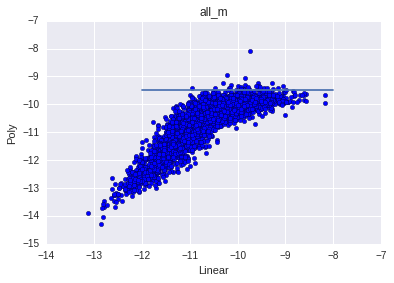

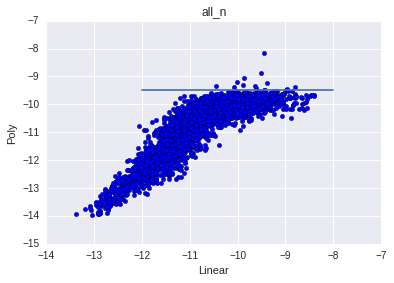

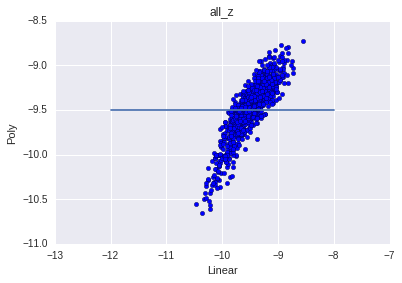

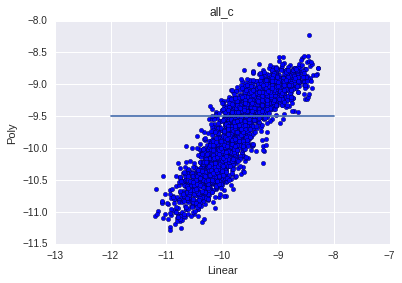

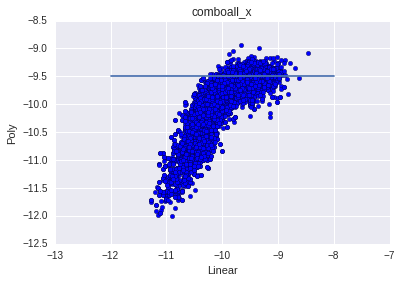

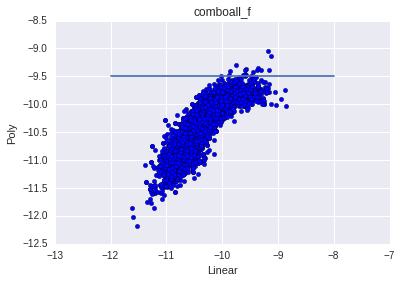

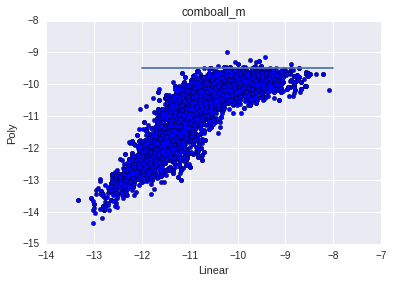

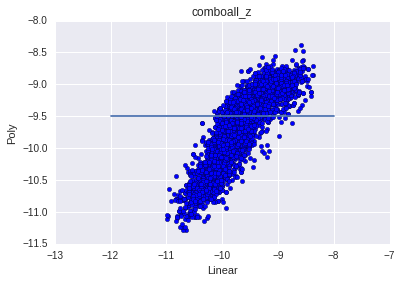

In [15]:
for dataset, datasetName in zip(myDataSets, myDataSetName):
    print(datasetName)
    prediction = []
    for idx,mode in enumerate(['linear','poly']):
        clf = pickle.load(open("/home/vxue/data/sort_specificity/rmse_doubleSet/ncv_y/model"+mode+datasetName+".pickle",'rb'))

        trainData_matrix_all = np.array([np.array(i) for i in dataset.aaEncoding.get_values()])
        trainData_y_all = np.array(dataset.yValue)

        prediction.append(clf.predict(trainData_matrix_all))
    figure()
    scatter(prediction[0],prediction[1])
    xlabel("Linear")
    ylabel("Poly")
    title(datasetName)
    plot([-12,-8],[-9.5,-9.5])
    